In [1]:
#library

In [2]:
import pandas as pd

In [3]:
#dataset

In [4]:
df = pd.read_csv(r'C:\Users\kelvin\OneDrive\Desktop\Spark\SampleSuperstore.csv')
print(df.shape)
df.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


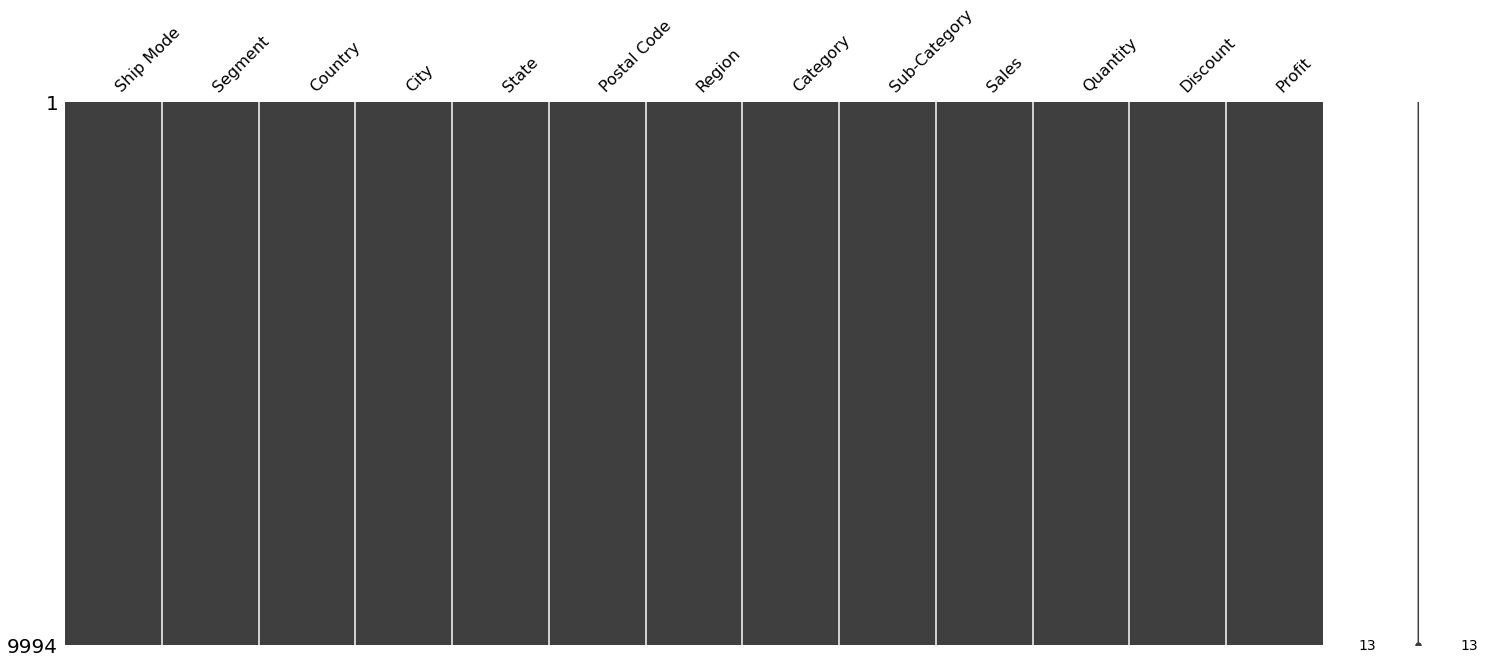

In [5]:
#Missing values
import missingno as msno
msno.matrix(df);

In [6]:
df[df.isna()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#order of columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
#correlation Sales Relation & Sales
# df.corr()
df.iloc[:,9:13].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


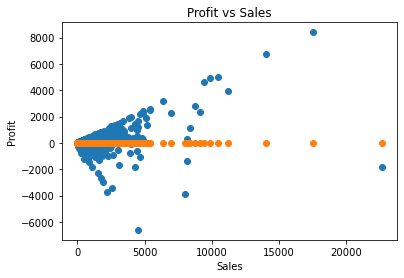

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Sales'],df['Profit'])
plt.scatter(df['Sales'],df['Discount'])
plt.ylabel('Profit')
plt.xlabel('Sales')
plt.title('Profit vs Sales')
plt.show()

In [12]:
df["Profit"].corr(df["Sales"])

0.4790643497377063

In [13]:
df["Profit"].corr(df["Discount"])

-0.21948745637176842

In [14]:
df[df['Profit'] >= df['Profit'].mean()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.184,9,0.2,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,249.584,2,0.2,31.1980
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.472,14,0.2,153.1152
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470


In [15]:
#Percentage of those made Profit & Loss

import numpy as np
df["PLstatus"]=np.where(df['Profit']> 0,'Profit','Loss')
df["PLstatus"].value_counts(normalize=True)*100

Profit    80.628377
Loss      19.371623
Name: PLstatus, dtype: float64

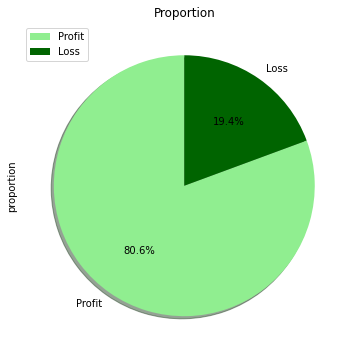

In [16]:
import matplotlib.pyplot as plt
color = ['lightgreen','darkgreen']

prop =pd.DataFrame( np.where( df["Profit"]>0,"Profit","Loss" ),columns=["proportion"])
prop["proportion"].value_counts().plot(kind='pie',
colors = color,
figsize= (8,6),
autopct ='%1.1f%%',
shadow=True,
startangle=90)
plt.title("Proportion")
plt.legend();

In [17]:
#info making Loss
df.where(df['Profit']== df['Profit'].min()).dropna()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PLstatus
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130.0,East,Technology,Machines,4499.985,5.0,0.7,-6599.978,Loss


In [18]:
#info making Profit
df.where(df['Profit']== df['Profit'].max()).dropna()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PLstatus
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905.0,Central,Technology,Copiers,17499.95,5.0,0.0,8399.976,Profit


In [19]:
# prop_loss = round(len(df[df['Profit']< 0])/len(df['Profit'])*100,2)

# print("Percentage of city making a loss",prop_loss)
# print("Percentage of city making a Profit",(100-prop_loss))

In [20]:
# labels = 'Loss','Profit',
# sizes = "24.03","75.97"
# colors = ["cyan","lightgreen"]
# explode = (0,0.1)
# fig1,ax1 = plt.subplots()
# ax1.pie(sizes,
#         explode=explode,
#         labels=labels,
#         autopct="%1.1f%%",
#         shadow=True,
#         colors=colors,
#         startangle=90)
# ax1.axis("equal")
# plt.show()

In [52]:
#Top 20 countries making Profit
pr = df.groupby(df['Region'])["Profit"].value_counts().sort_values(ascending=False).rename('frequency').to_frame().reset_index()

pr.head(20)

,Region,Profit,frequency
0,West,6.2208,22
1,West,0.0000,22
2,West,9.3312,20
3,East,0.0000,19
4,Central,3.6288,16
5,South,0.0000,13
6,East,9.3312,12
7,West,15.5520,11
8,Central,0.0000,11
9,Central,5.4432,10


In [53]:
#Bottom countries making Profit
pr.tail(20)

,Region,Profit,frequency
8631,East,4.4792,1
8632,East,4.4772,1
8633,East,4.4604,1
8634,East,4.4564,1
8635,East,4.4200,1
8636,East,4.1680,1
8637,East,4.4174,1
8638,East,4.3904,1
8639,East,4.3524,1
8640,East,4.3500,1


In [23]:
# SPR = (pd.DataFrame(df['Profit']/df['Sales'],columns=['SalesProfitRatio']))*100
# SPR.head(20)


for i in range(len(df)):
    df.loc[i,"ProfitMargin"] =(df.loc[i, "Profit"]/df.loc[i, "Sales"])*100
df

,SalesProfitRatio
0,16.00
1,30.00
2,47.00
3,-40.00
4,11.25
5,29.00
6,27.00
7,10.00
8,31.25
9,30.00


In [24]:
SPR.tail(20)

,SalesProfitRatio
9974,28.00
9975,48.00
9976,12.50
9977,0.00
9978,35.00
9979,35.00
9980,26.00
9981,32.50
9982,47.00
9983,28.00


In [25]:
#Compare the regons's profit which is high and which is low
import seaborn as sns

In [26]:
pr = pd.DataFrame(pr)

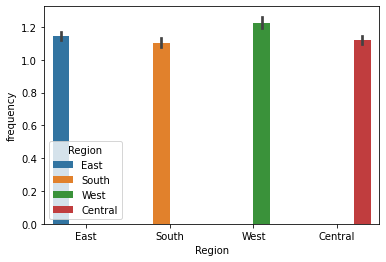

In [27]:
sns.barplot(
    x= 'Region',
    y= 'frequency',
    hue = "Region",
    data = pr,
#      order = Profit.values()
    
);

In [28]:
#Which region receive most customers frequency

pr.groupby('Region')['frequency'].sum()

Region
Central    2323
East       2848
South      1620
West       3203
Name: frequency, dtype: int64

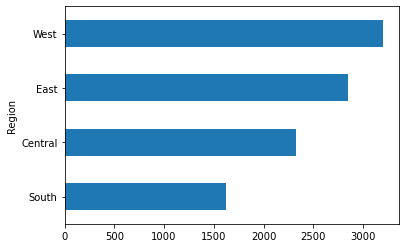

In [29]:
pr.groupby('Region')['frequency'].sum().sort_values().plot(kind='barh');

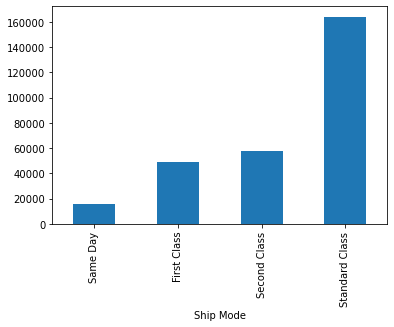

In [30]:
#Whic Ship mode generate profit

df.groupby(["Ship Mode"])["Profit"].sum().sort_values().plot(kind='bar');

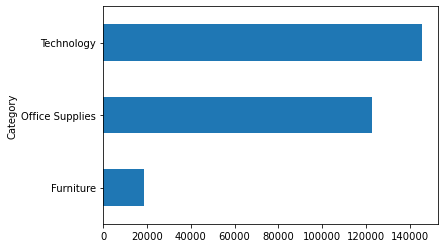

In [31]:
#Category with high profit and those with low profit
df.groupby(["Category"])["Profit"].sum().plot(kind='barh');

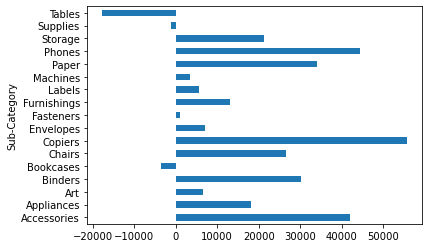

In [32]:
#Sub category making Loss 0 and below,aboloshed

df.groupby(["Sub-Category"])["Profit"].sum().plot(kind='barh');

In [33]:
 #Top 20 most visited cities
pd.DataFrame(df["State"].value_counts().sort_values(ascending=False)).head(30)

,State
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255
North Carolina,249


In [34]:
#Bottom 30 most visited cities
pd.DataFrame(df["State"].value_counts().sort_values(ascending=False)).tail(30)

,State
Oregon,124
Wisconsin,110
Maryland,105
Delaware,96
Minnesota,89
Connecticut,82
Oklahoma,66
Missouri,66
Alabama,61
Arkansas,60


In [35]:
# df['Sub-Category'].unique()

In [36]:
#Summarize Ship mode and Segment frequency
df.groupby(["Ship Mode","Segment"]).count()

Country  City  State  Postal Code  Region  \
Ship Mode      Segment                                                  
First Class    Consumer         769   769    769          769     769   
               Corporate        485   485    485          485     485   
               Home Office      284   284    284          284     284   
Same Day       Consumer         317   317    317          317     317   
               Corporate        114   114    114          114     114   
               Home Office      112   112    112          112     112   
Second Class   Consumer        1020  1020   1020         1020    1020   
               Corporate        609   609    609          609     609   
               Home Office      316   316    316          316     316   
Standard Class Consumer        3085  3085   3085         3085    3085   
               Corporate       1812  1812   1812         1812    1812   
               Home Office     1071  1071   1071         1071    1071   

                            Category  Sub-Category  Sales  Quantity  Discount  \
Ship Mode      Segment                                                          
First Class    Consumer          769           769    769       769       769   
               Corporate         485           485    485       485       485   
               Home Office       284           284    284       284       284   
Same Day       Consumer          317           317    317       317       317   
               Corporate         114           114    114       114       114   
               Home Office       112           112    112       112       112   
Second Class   Consumer         1020          1020   1020      1020      1020   
               Corporate         609           609    609       609       609   
               Home Office       316           316    316       316       316   
Standard Class Consumer         3085          3085   3085      3085      3085   
               Corporate        1812          1812   1812      1812      1812   
               Home Office      1071          1071   1071      1071      1071   

                            Profit  PLstatus  
Ship Mode      Segment                        
First Class    Consumer        769       769  
               Corporate       485       485  
               Home Office     284       284  
Same Day       Consumer        317       317  
               Corporate       114       114  
               Home Office     112       112  
Second Class   Consumer       1020      1020  
               Corporate       609       609  
               Home Office     316       316  
Standard Class Consumer       3085      3085  
               Corporate      1812      1812  
               Home Office    1071      1071

In [37]:
#Which is the highest ship mode and with Sales
df.groupby(["Ship Mode","Segment"])["Sales"].sum()

Ship Mode       Segment    
First Class     Consumer       159168.9650
                Corporate      105858.4699
                Home Office     86400.9880
Same Day        Consumer        60596.3590
                Corporate       45121.3230
                Home Office     22645.4430
Second Class    Consumer       231498.9496
                Corporate      146126.0388
                Home Office     81568.5810
Standard Class  Consumer       710137.0714
                Corporate      409040.5351
                Home Office    239038.1365
Name: Sales, dtype: float64

In [38]:
# df.groupby(["Region","Ship Mode"]).Profit.value_counts().reset_index(name ="name")

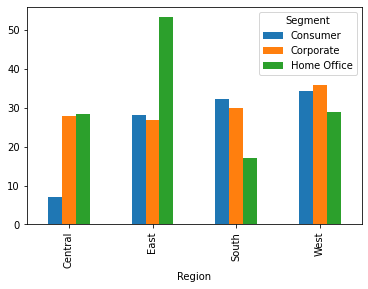

In [39]:
#preferred ship mode in which region and which achieved high profit
pv = df.pivot_table(index="Region",columns="Segment",values="Profit")
pv.plot(kind="bar");

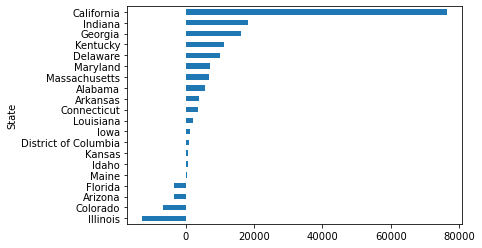

In [40]:
df.groupby(["State"]).Profit.sum().head(20).sort_values().plot(kind="barh");

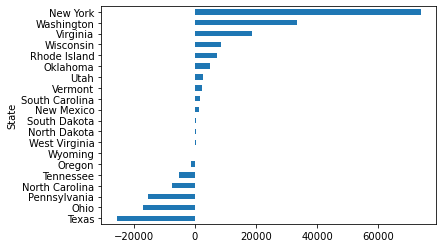

In [41]:
df.groupby(["State"]).Profit.sum().tail(20).sort_values().plot(kind="barh");

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

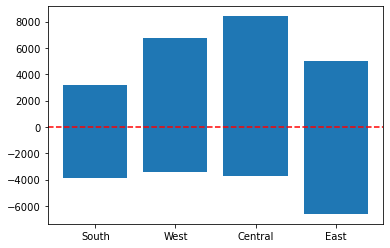

In [58]:
#Add xtick to zero mark
#Profit and Loss in the country with high profit
plt.bar(df["Region"],df["Profit"])
plt.axhline(df['Profit'].mean(), color = "r", linestyle= "--");
plt.show()

In [44]:
#Proportion of Sales of the country with the high loss.
df[df['Profit']==df['Profit'].min()]
print('proportion of Sales:', (df['Profit'].min())/(df['Profit'].sum()))

proportion of Sales: -0.023044855567365


In [45]:
df[df['Profit'] ==df['Profit'].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PLstatus
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978,Loss


In [46]:
# SPR.iloc[:,7772]
SPR.iloc[7772,:]

SalesProfitRatio   -146.666667
Name: 7772, dtype: float64

In [47]:
SPR['SalesProfitRatio'].describe()

count    9994.000000
mean       12.031393
std        46.675435
min      -275.000000
25%         7.500000
50%        27.000000
75%        36.250000
max        50.000000
Name: SalesProfitRatio, dtype: float64

In [48]:
#Retrieve the data with profit less 0,unpreffered ship mode, product , product category and the region with the low profitability

neg_profit = df.where(
    (df['Profit'] < 0) 
         &
    (df['Region'] =="West" )
    &
      (df['Ship Mode'] =='Standard Class' )
).dropna()
neg_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,PLstatus
95,Standard Class,Home Office,United States,Portland,Oregon,97206.0,West,Office Supplies,Binders,5.682,1.0,0.70,-3.7880,Loss
103,Standard Class,Consumer,United States,Aurora,Colorado,80013.0,West,Technology,Accessories,238.896,6.0,0.20,-26.8758,Loss
104,Standard Class,Consumer,United States,Aurora,Colorado,80013.0,West,Furniture,Furnishings,102.360,3.0,0.20,-3.8385,Loss
105,Standard Class,Consumer,United States,Aurora,Colorado,80013.0,West,Office Supplies,Binders,36.882,3.0,0.70,-25.8174,Loss
126,Standard Class,Consumer,United States,Phoenix,Arizona,85023.0,West,Office Supplies,Binders,2.388,2.0,0.70,-1.8308,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,Standard Class,Consumer,United States,Glendale,Arizona,85301.0,West,Office Supplies,Storage,35.168,2.0,0.20,-8.3524,Loss
9646,Standard Class,Consumer,United States,Glendale,Arizona,85301.0,West,Office Supplies,Binders,72.588,2.0,0.70,-48.3920,Loss
9654,Standard Class,Home Office,United States,Tucson,Arizona,85705.0,West,Office Supplies,Binders,4.938,2.0,0.70,-3.6212,Loss
9826,Standard Class,Consumer,United States,San Francisco,California,94122.0,West,Furniture,Chairs,195.136,4.0,0.20,-12.1960,Loss


In [50]:
df.iloc[7772,:]

Ship Mode       Standard Class
Segment               Consumer
Country          United States
City                 Lancaster
State                     Ohio
Postal Code              43130
Region                    East
Category            Technology
Sub-Category          Machines
Sales                 4499.985
Quantity                     5
Discount                   0.7
Profit               -6599.978
PLstatus                  Loss
ProfitMargin       -146.666667
Name: 7772, dtype: object